In [18]:
from hyobj import DataSet
from hyal.uncertainty_estimatimation import UncertaintyEstimation
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import pandas
ue = UncertaintyEstimation()

In [19]:
dataset = DataSet('10_geos.pkl')
results=ue.make_deviation_report(dataset,save_all=True,n_models_calibration=[2,3,4,5,6,7,8,9])
results.keys()

dict_keys(['dev_models_vs_mean', 'dev_models_vs_ref', 'dev_mean_vs_ref', 'error_models_vs_ref', 'error_mean_vs_ref', 'uncalibrated_error_estimate_estimate_models_vs_mean', 'ue_corrections_per_model', 'calibrated_error_estimate_mean_vs_ref', 'calibrated_error_estimate_models_vs_ref', 'residuals_mean_vs_ref', 'residuals_models_vs_ref', 'residuals_models_vs_mean', 'errors_models_vs_ref_geometry_id_dataset_id', 'errors_models_vs_ref_dataset_id', 'calibrated_error_estimate_models_vs_ref_geometry_id_dataset_id', 'calibrated_error_estimate_models_vs_ref_dataset_id'])

<Axes: ylabel='Density'>

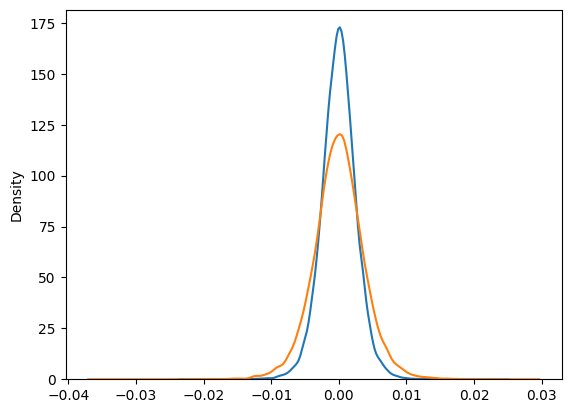

In [20]:
dev_mean = DataSet(results['dev_models_vs_mean'])
dev_ref = DataSet(results['dev_models_vs_ref'])
sns.kdeplot(ue.flatten(dev_mean.data.forces), label='mean')
sns.kdeplot(ue.flatten(dev_ref.data.forces), label='ref')

In [21]:
uncalibrated_error_estimate_estimate_models_vs_mean=DataSet(results['uncalibrated_error_estimate_estimate_models_vs_mean'])


<Axes: ylabel='Density'>

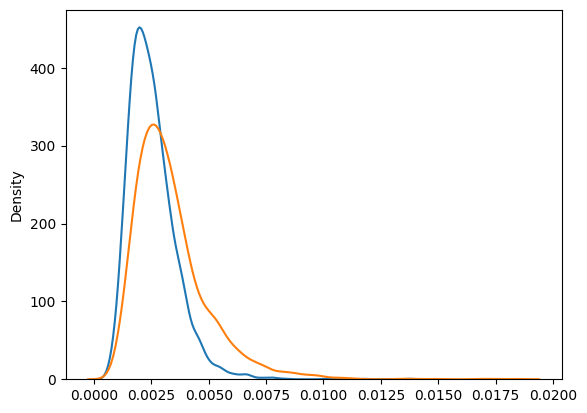

In [22]:
uncalibrated_error_estimate_estimate_models_vs_mean=DataSet(results['uncalibrated_error_estimate_estimate_models_vs_mean'])
error_models_vs_ref=DataSet(results['error_models_vs_ref'])
sns.kdeplot(ue.flatten(uncalibrated_error_estimate_estimate_models_vs_mean.data.forces), label='uncalibrated_error_estimate_estimate_models_vs_mean')
sns.kdeplot(ue.flatten(error_models_vs_ref.data.forces), label='error_models_vs_ref')   

In [23]:
matched_uncertainty = ue.get_matched_dataset(
            dev_ref, uncalibrated_error_estimate_estimate_models_vs_mean
        )
assert matched_uncertainty.data.forces.shape == dev_ref.data.forces.shape

for col in ['forces','energy','geometry_id']:
    assert np.allclose(
        ue.flatten(matched_uncertainty.data[::9][col]), ue.flatten(uncalibrated_error_estimate_estimate_models_vs_mean.data[col])
    )

for col in ['geometry_id']:
    assert np.allclose(
        ue.flatten(matched_uncertainty.data[col]), ue.flatten(dev_ref.data[col])
    )

In [24]:
errors=ue.flatten(dev_ref.data.forces)
sigma=ue.flatten(matched_uncertainty.data.forces)
corr=ue.get_corrections_from_arrays(sigma,errors)
print(corr)
cal_sigma=corr[0]*sigma+corr[1]

[1.0480133476566371, 0.0008817415271240336]


([], [])

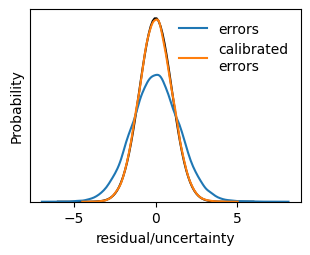

In [25]:
# plot normal distribution
plt.figure(figsize=(3.5,2.5))
def normal_distribution(x, mu, sigma):
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2))
x=np.linspace(-6,6,100)
plt.plot(x, normal_distribution(x,0,1),color='black')
sns.kdeplot(errors/sigma, label='errors')
sns.kdeplot(errors/cal_sigma, label='calibrated\nerrors')
plt.legend(frameon=False)
plt.xlabel('residual/uncertainty')
plt.ylabel('Probability')
plt.yticks([])
